In [43]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as plt
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
#Set alpha at the beginning
Alpha = 0.05

In [44]:
#Collect the dataset from fb55 Github
!curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/Lab9_fb55/Asc.csv?accessType=Download > df.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   415  100   415    0     0   2616      0 --:--:-- --:--:-- --:--:--  2626


In [45]:
#Move it to PUIDATA folder
!mv df.csv $PUIDATA

In [46]:
#Read it into the notebook
df = pd.read_csv(os.getenv("PUIDATA") + \
                 '/df.csv', header=None, names=['x', 'y1','tmp2', 'y2', 'tmp3', 'tmp4', 'tmp5', 'tmp6'], sep="\t")

In [47]:
#Show the whole dataframe
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [48]:
#Sort the values by x
df.sort_values(by='x', inplace=True)

In [49]:
#Show the whole dataframe
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71


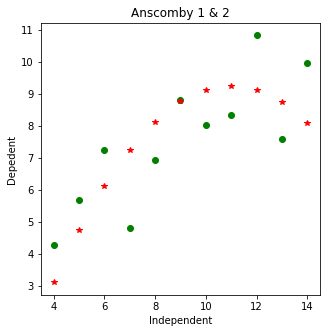

In [50]:
#Plot x vs y1 and x vs y2
pl.figure(figsize=(5,5))
pl.plot(df['x'], df['y1'], 'go')
pl.plot(df['x'], df['y2'], 'r*')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 & 2');

In [51]:
#Create an OLS model between x and y1
OLS1 = smf.ols(formula='y1  ~ x', data=df).fit()
OLS1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 27 Nov 2018   Prob (F-statistic):            0.00217
Time:                        16:53:44   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026         0.456     5.544
x              0.5001      0.118      4.241      0.002         0.233     0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

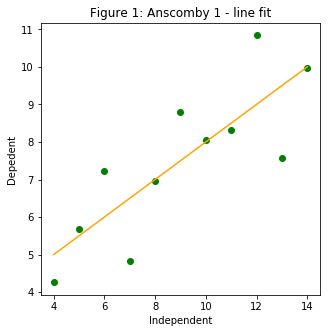

In [74]:
#Plot the model predictions over x vs y1
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS1.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Figure 1: Anscomby 1 - line fit');

Figure one show the x (independent) and y1 (dependent) variables plotted against each other. The line was created by predicted values produced by an OLS model using x and y1. The model appears to be a good fit as multiple existing data points run through the prediction line. 

In [53]:
# create a new feature for x^2
df['x2'] = df['x']**2

In [54]:
#Create a new model between x plus x^2 and y1
OLS2 = smf.ols(formula='y1 ~ x2 + x',data=df).fit()
OLS2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Tue, 27 Nov 2018   Prob (F-statistic):            0.00956
Time:                        16:53:44   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.824        -6.827     8.338
x2            -0.0316      0.043     -0.729      0.487        -0.132     0.068
x              1.0693      0.790      1.354      0.213        -0.752     2.891
==============================================================================
Omnibus:                        0.167   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.302
Skew:                          -0.220   Prob(JB):                        0.860
Kurtosis:                       2.318   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

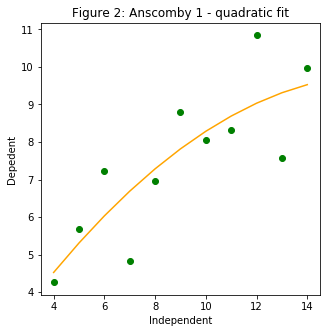

In [75]:
#Plot the new model predictions over x vs y1
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS2.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Figure 2: Anscomby 1 - quadratic fit');

Figure two show the x (independent) and y1 (dependent) variables plotted against each other. The curve was created by predicted values produced by an OLS model using x, x^2, and y1. The model does not appear to be a good fit as no predicted data run through the existing data. 

In [56]:
#Perform and LR test against the two models
OLS2.compare_lr_test(OLS1)

(0.70794919019374447, 0.40012547285804223, 1.0)

In [72]:
#Calculate the LR test by hand
LR = -2 * (-16.841 - -16.487)
print(LR)

0.7080000000000055


The LR test determines whether or not our model with added parameters is a better fit than our non restircted model. The LR test and hand calculation were found to be 0.7079 and 0.708 respectively. For 1 degree of freedom and alpha = 0.05, the critical value is found to be 3.84. Our critical values found are less than this, resulting in an inability to reject the null. That is, that the simpler model is a better fit to the data. 

# For Y2

In [81]:
#Create an OLS model between x and y2
OLS3 = smf.ols(formula='y2  ~ x', data=df).fit()
OLS3.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Thu, 29 Nov 2018   Prob (F-statistic):            0.00218
Time:                        21:15:19   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026         0.455     5.547
x              0.5000      0.118      4.239      0.002         0.233     0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

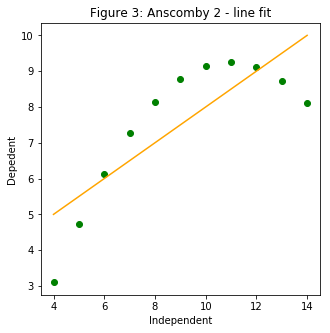

In [82]:
#Plot the model predictions over x vs y2
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y2'],'go')
pl.plot(df['x'], OLS3.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Figure 3: Anscomby 2 - line fit');

Figure three show the x (independent) and y2 (dependent) variables plotted against each other. The line was created by predicted values produced by an OLS model using x and y2. The model does not appear to be a good fit as very few existing data points run through the prediction line.

In [83]:
#Create a new model between x plus x^2 and y2
OLS4 = smf.ols(formula='y2 ~ x2 + x',data=df).fit()
OLS4.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           8.64e-26
Time:                        21:15:19   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.000        -6.006    -5.986
x2            -0.1267   5.71e-05  -2219.238      0.000        -0.127    -0.127
x              2.7808      0.001   2673.741      0.000         2.778     2.783
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   2.928
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.697
Skew:                           0.809   Prob(JB):                        0.428
Kurtosis:                       1.959   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

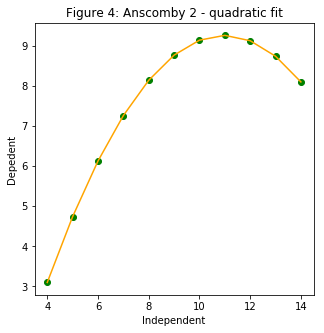

In [84]:
#Plot the new model predictions over x vs y2
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y2'],'go')
pl.plot(df['x'], OLS4.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Figure 4: Anscomby 2 - quadratic fit');

Figure four show the x (independent) and y2 (dependent) variables plotted against each other. The curve was created by predicted values produced by an OLS model using x, x^2 and y1. The model appears to be a good fit as all existing data points run through the prediction line.

In [85]:
#Perform and LR test against the two models
OLS4.compare_lr_test(OLS3)

(146.63437980392047, 9.4331834208378821e-34, 1.0)

In [86]:
#Calculate the LR test by hand
LR = -2 * (-16.487 - 56.471)
print(LR)

145.916


The LR test determines whether or not our model with added parameters is a better fit than our non restircted model. The LR test and hand calculation were found to be 146.63 and 145.92 respectively. For 1 degree of freedom and alpha = 0.05, the critical value is found to be 3.84. Our critical values found are less than this, resulting in a rejection of the null. That is, that the model with added parameters is a better fit to the data.